### Задание

На этот раз ситуация следующая: вы работаете в приложении по доставке готовых продуктов. К вам пришел коллега с результатами двух тестов:

В первом тестировали разрешение фотографий блюд в приложении: пользователям показывались либо прямоугольные, либо новые квадратные 

Во втором: была обновлена кнопка заказа, и часть юзеров видела старый вариант, а часть – новый

Коллега пришел к вам с просьбой: он посмотрел на графики и предположил, что среди групп могут встретиться различия. Ваша задача – помочь ему проверить гипотезы, сделать соответствующие выводы на основе статистических тестов и принять решения.

In [74]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import pingouin as pg
import seaborn as sns
import matplotlib as plt

import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

%matplotlib inline

### Описание данных  

```5_task_1:```  

```id``` – id клиента в эксперименте  
```group``` – в каком разрешении показывались картинки (A – прямоугольные 16:9, B – квадратные, C – прямоугольные 12:4)  
```events``` – сколько блюд суммарно было заказано за период  


```5_task_2:```

```id``` – id клиента в эксперименте  
```segment``` – сегмент (high/low)  
```group``` – вид кнопки (control – старая версия, test – новая версия)  
```events``` – сколько блюд суммарно было заказано за период

### Задание 1

Проверьте, являются ли дисперсии внутри групп примерно одинаковыми (гомогенными) с помощью теста Левена.

In [50]:
task_1_df = pd.read_csv('5_task_1.csv')
task_1_df.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


In [33]:
task_1_A_group = task_1_df.query('group == "A"').events
task_1_B_group = task_1_df.query('group == "B"').events
task_1_C_group = task_1_df.query('group == "C"').events

In [34]:
ss.levene(task_1_A_group, task_1_B_group, task_1_C_group)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

In [36]:
0.1041327199523974 > 0.05
#p-value > 0.05, не отклоняем нулевую гипотезу

True

### Задание 2

Также убедитесь, что данные распределены нормально - тем же способом, что и в прошлом уроке.

In [37]:
ss.normaltest(task_1_A_group)

NormaltestResult(statistic=2.1034599402238734, pvalue=0.3493328906085719)

In [40]:
0.3493328906085719 > 0.05

True

In [38]:
ss.normaltest(task_1_B_group)

NormaltestResult(statistic=0.8410715800223014, pvalue=0.6566948749848232)

In [41]:
0.6566948749848232 > 0.05

True

In [39]:
ss.normaltest(task_1_C_group)

NormaltestResult(statistic=3.243725809054571, pvalue=0.19753037588314626)

In [42]:
0.19753037588314626 > 0.05

True

### Задание 3

In [43]:
ss.f_oneway(task_1_A_group, task_1_B_group, task_1_C_group)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

In [45]:
round(2886.166657438961)

2886

Для сравнения средних я использую однофакторный дисперсионный анализ. Значение статистики равно (окр. до целого) 2886, а р-уровень значимости составил 0.

### Задание 4

Теперь используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия. 

In [51]:
pairwise_tukeyhsd(task_1_df.events, task_1_df.group).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,8.034,0.001,7.7038,8.3642,True
A,C,-2.1093,0.001,-2.4395,-1.7791,True
B,C,-10.1433,0.001,-10.4735,-9.8131,True


### Задание 5

Во втором эксперименте требуется проверить, как пользователи отреагируют на изменение формата кнопки оформления заказа, с разбивкой по сегменту клиента.

In [54]:
task_2_df = pd.read_csv('5_task_2.csv')
task_2_df.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


Посмотрим на данные. Для начала визуализируйте распределение events для контрольной и тестовой групп. Соотнесите графики распределения и экспериментальные группы:

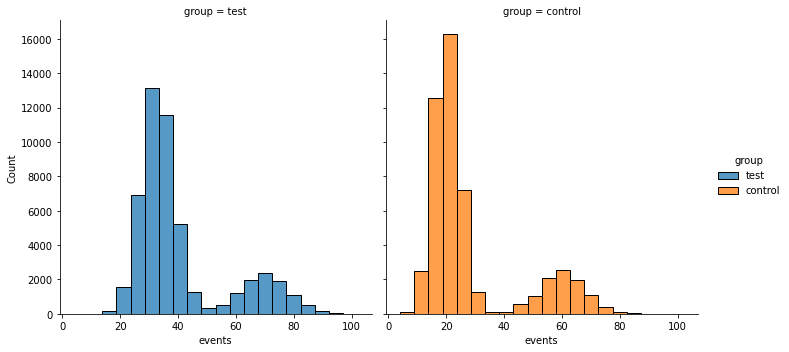

In [94]:
sns.displot(data=task_2_df, x='events', hue='group', bins=20, col='group')

### Задание 5

Посчитайте среднее, медиану и стандартное отклонение events в разбивке по группе и по сегменту пользователя. 

В качестве ответа укажите стандартное отклонение для пользователей из сегмента high и контрольной группы, с точностью до 2 знаков после точки.

In [64]:
task_2_df.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


In [70]:
task_2_df.groupby(['group', 'segment']).describe()

id                                                     \
                   count        mean           std   min       25%      50%   
group   segment                                                               
control high     10000.0  50473.9782  28761.438914  10.0  25612.50  51031.0   
        low      40000.0  49935.2567  28855.849243   0.0  25022.25  49944.5   
test    high     10000.0  50126.6206  28821.133487  14.0  25317.50  50234.5   
        low      40000.0  49913.3436  28917.383492   1.0  24763.75  49706.5   

                                     events                                   \
                      75%      max    count       mean       std   min   25%   
group   segment                                                                
control high     75261.25  99976.0  10000.0  59.970800  7.805347  31.0  55.0   
        low      74874.25  99999.0  40000.0  20.031575  4.473576   4.0  17.0   
test    high     74783.25  99996.0  10000.0  69.938500  8.403974  40.0  64.0   
        low      75127.25  99995.0  40000.0  33.025925  5.720845  13.0  29.0   

                                    
                  50%   75%    max  
group   segment                     
control high     60.0  65.0   89.0  
        low      20.0  23.0   41.0  
test    high     70.0  76.0  102.0  
        low      33.0  37.0   59.0

In [71]:
round(7.805347, 2)

7.81

### Задание 6

Проведите тест (через anova_lm либо pg.anova), а затем используйте критерий Тьюки, чтобы понять между какими группами есть статистически значимые различия.

In [78]:
model = smf.ols(formula = "events ~ C(group) * C(segment)", data=task_2_df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(group),1.0,3.837195e+06,3.837195e+06,112031.864119,0.000000e+00
C(segment),1.0,2.362480e+07,2.362480e+07,689756.377484,0.000000e+00
C(group):C(segment),1.0,3.664244e+04,3.664244e+04,1069.823273,2.060261e-233
Residual,99996.0,3.424956e+06,3.425093e+01,NaN,NaN


In [91]:
task_2_df['combination'] = task_2_df.group + ' / ' + task_2_df.segment
task_2_df.head()

,id,group,segment,events,combination
0,83440,test,high,78.0,test / high
1,96723,test,high,71.0,test / high
2,68719,test,high,80.0,test / high
3,50399,test,high,80.0,test / high
4,95613,test,high,78.0,test / high


In [83]:
pg.pairwise_tukey(data=task_2_df, dv='events', between='combination') \
    .sort_values(by=['A','diff'], ascending=False)

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
5,test / high,test / low,69.938500,33.025925,36.912575,0.065432,564.135148,0.001,6.307128
4,control / low,test / low,20.031575,33.025925,-12.994350,0.041383,-314.002699,0.001,-2.220314
3,control / low,test / high,20.031575,69.938500,-49.906925,0.065432,-762.727892,0.001,-8.527429
0,control / high,control / low,59.970800,20.031575,39.939225,0.065432,610.391461,0.001,6.824282
2,control / high,test / low,59.970800,33.025925,26.944875,0.065432,411.798717,0.001,4.603981
1,control / high,test / high,59.970800,69.938500,-9.967700,0.082766,-120.432523,0.001,-1.703109


### Задание 7

Визуализируйте результаты теста

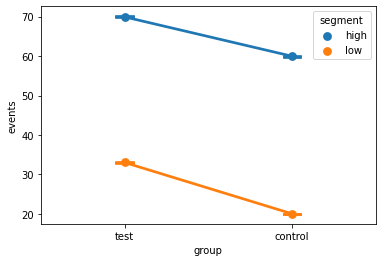

In [93]:
sns.pointplot(x="group", y="events", hue="segment", data=task_2_df, capsize=0.1)

Фактор group оказался **значимым**, фактор segment – **значимым**, их взаимодействие – **значимо**.  
Судя по графику, для всех групп среднее значение events **увеличилось**, поэтому решение: **выкатываем новую версию**